In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Paramertization of the model

rmax = 1
kn = 0.5
qp = 0.08
qz = 0.02
b = 0.5
gmax = 0.5
Iv = 1.2

In [25]:
def n_prime(n, p, z):
  return ((0.3*1*p) + (1-0.56)*0.15*z +0.1*p+0.05*z)
def p_prime(n, p, z, t):
  return ((0.3*1*p)-(0.1*z)-(0.1*p))
def z_prime(p, z):
  return ((0.56*0.15*z)-(0.05*z))

#initial values
t = 0
t_i = 0.1
p = 100
z = 20
n = 50

t_array = []
p_array = []
z_array = []
n_array = []

while t <= 10:
  t = t + t_i
  new_p = p_prime(p, z)*t_i + p
  new_z = z_prime(z)*t_i + z
  new_n = n_prime(p, z)*t_i + n
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)



{'zooplankton': [20.068, 20.1362312, 20.20469438608, 20.27339034699267, 20.342319874172446, 20.411483761744634, 20.480882806534566, 20.550517808076783, 20.620389568624244, 20.690498893157567, 20.7608465893943, 20.83143346779824, 20.902260341588757, 20.97332802675016, 21.04463734204111, 21.11618910900405, 21.187984151974664, 21.26002329809138, 21.33230737730489, 21.404837222387727, 21.477613668943846, 21.550637555418255, 21.623909723106678, 21.69743101616524, 21.7712022816202, 21.84522436937771, 21.919498132233596, 21.99402442588319, 22.068804108931193, 22.14383804290156, 22.219127092247426, 22.294672124361067, 22.370474009583894, 22.446533621216478, 22.522851835528613, 22.59942953176941, 22.676267592177425, 22.753366901990827, 22.830728349457594, 22.90835282584575, 22.986241225453625, 23.064394445620167, 23.142813386735273, 23.221498952250172, 23.300452048687823, 23.37967358565336, 23.45916447584458, 23.53892563506245, 23.618957982221662, 23.699262439361217, 23.779839931655044, 23.8606

In [26]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [27]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton
0,0,54.232000,101.800000,0.1,20.068000
1,1,58.536789,103.635320,0.2,20.136231
2,2,62.915782,105.506664,0.3,20.204694
3,3,67.370423,107.414750,0.4,20.273390
4,4,71.902184,109.360312,0.5,20.342320


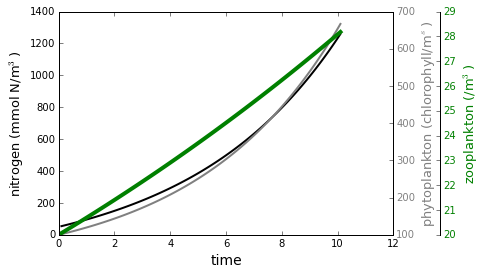

In [32]:
# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (mmol N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (chlorophyll/m$^s$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')
    
plt.show()